# Project 3 - 2D FFT Explainer
Andrew Koren

This project serves to give an overview of the 2D FFT transform, including an explanation of the maths behind the transform, the 

Overview

Going from 1D to 2D

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
import numpy as np
from numpy import fft

grayscale = sns.color_palette(palette='Greys')
grayscale.reverse()
gray_cmap = ListedColormap(grayscale)

We can take the fourier transform of any image

<Axes: >

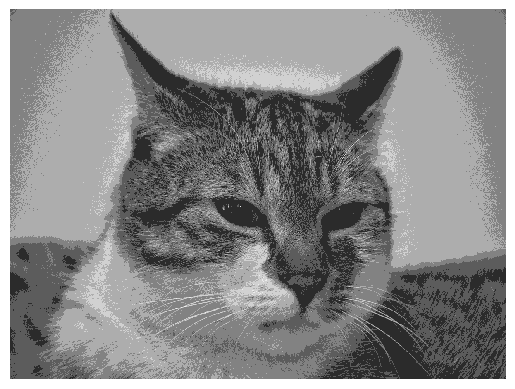

In [2]:
img = Image.open('grayscale-cat.jpg').convert('L')

img_as_np = np.asarray(img)

#grayscale = sns.cm.rocket #- produces rocket cat

sns.heatmap(img_as_np, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)

Text(0.5, 1.0, 'Phase $\\left(\\tan(im/re)\\right)$')

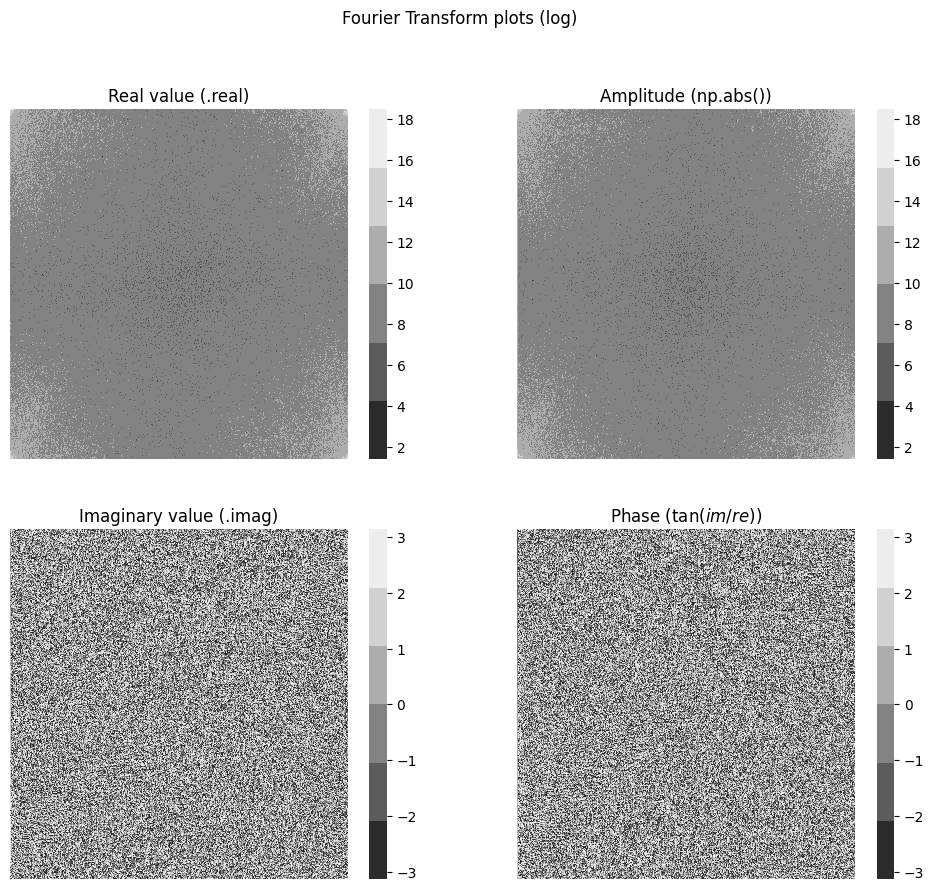

In [3]:
img_fft = fft.fft2(img_as_np)

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform plots (log)')
sns.heatmap(np.log(img_fft).real, cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0, 0])
axs[0,0].set_title('Real value (.real)')
sns.heatmap(np.log(np.abs(img_fft)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0, 1])
axs[0,1].set_title('Amplitude (np.abs())')

sns.heatmap(np.log(img_fft).imag, cmap=grayscale, xticklabels=False, yticklabels=False, ax =axs[1, 0])
axs[1,0].set_title('Imaginary value (.imag)')

sns.heatmap(np.atan2(img_fft.imag, img_fft.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax =axs[1, 1])
axs[1,1].set_title(r'Phase $\left(\tan(im/re)\right)$')


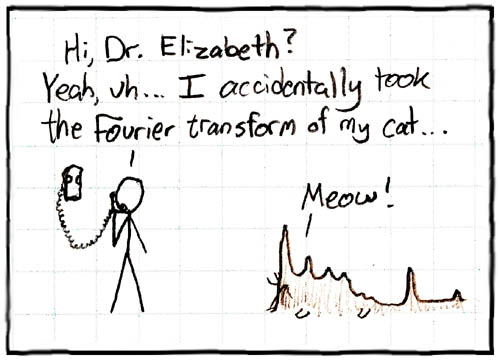 https://xkcd.com/26/

Jokes aside, notice that the fourier transformed image is complex-valued. 

Amplitude vs Phase

<Axes: >

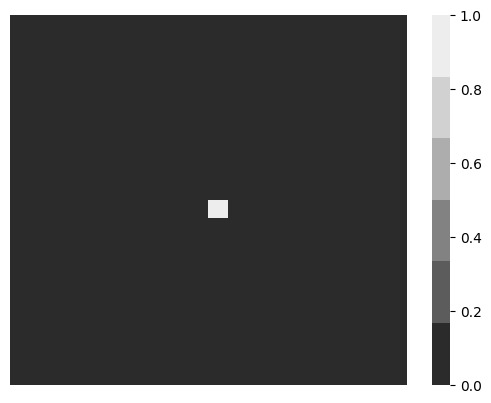

In [32]:
spatial_image = np.zeros((20,20))
spatial_image[10, 10] = 1

sns.heatmap(spatial_image, xticklabels=False, yticklabels=False, cmap=grayscale)

Discrete vs Continuous

In [35]:
transformed_image = fft.fft2(spatial_image)
transformed_image[:3]

array([[ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
        -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,
         1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,
         1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
        -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
        -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,
         1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j]])

Text(0.5, 1.0, 'Phase')

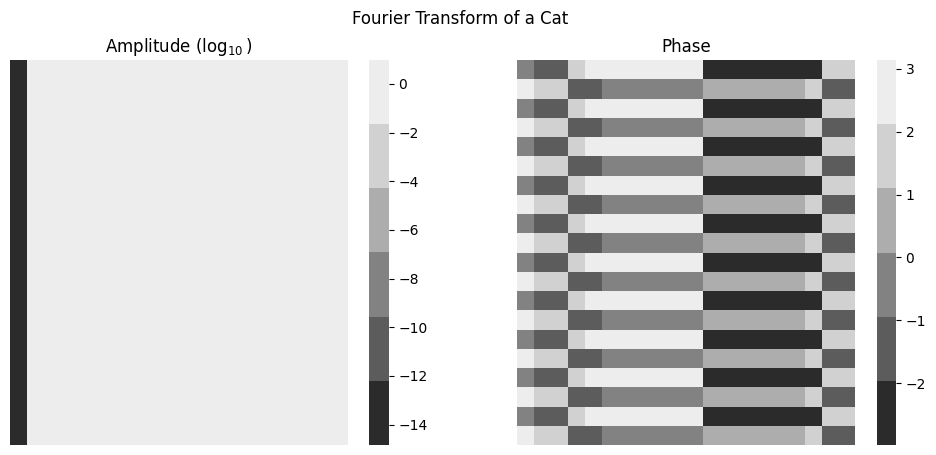

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat')

sns.heatmap(np.log10(np.abs(transformed_image)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(transformed_image.imag, transformed_image.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

Talk about math

Some periodic structures

<Axes: >

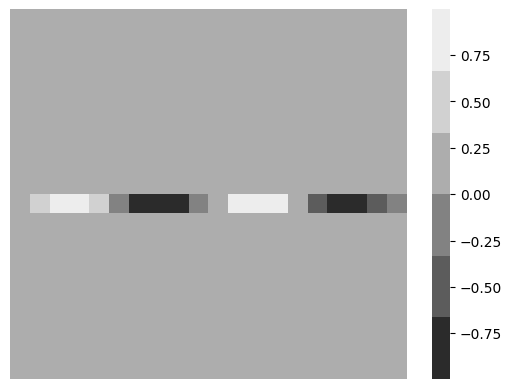

In [37]:
spatial_image = np.zeros((20,20))

x = np.linspace(-2*np.pi, 2*np.pi, 20)
spatial_image[10, :] = np.sin(x)

sns.heatmap(spatial_image, xticklabels=False, yticklabels=False, cmap=grayscale)

Text(0.5, 1.0, 'Phase')

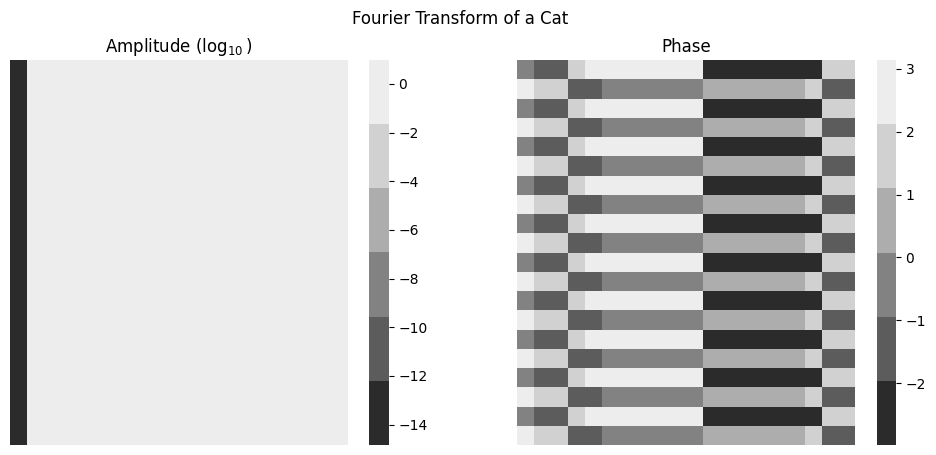

In [ ]:
transformed_image = fft.fft2(spatial_image)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat')

sns.heatmap(np.log10(np.abs(transformed_image)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(transformed_image.imag, transformed_image.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase');

Note that the bar on the left matches the frequency of the line, but there is destructive interference

Shotgun of various transforms

animation

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, IntSlider
%matplotlib inline 

grid_size = 20
heatmap = np.zeros((grid_size, grid_size))

def update(x, y):
    heatmap[:] = 0
    heatmap[y, x] = 1
    ft_heatmap = fft.fft2(heatmap)

    #yes I redraw the whole thing every time, it's the best I could do
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
    ax0.imshow(heatmap, cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax1.imshow(abs(ft_heatmap), cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax1.set_title('Amplitude')
    ax2.imshow(np.arctan2(ft_heatmap.imag, ft_heatmap.real), cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax2.set_title('Phase')
    plt.show()

# Set up sliders
interact(
    update,
    x=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="X Position"),
    y=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="Y Position"),
);

interactive(children=(IntSlider(value=10, description='X Position', max=19), IntSlider(value=10, description='…

I think something related to backend choice causes the plots to appear twice. This works in VS code so it's good enough for me.

This interactive plot, as well as the one below, is meant to challenge your understanding of the 2D plot and help build intuition. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, IntSlider
%matplotlib inline 

grid_size = 20
heatmap = np.zeros((grid_size, grid_size))

def update(x, y, phase):
    heatmap[:] = 0
    heatmap[y, x] = 1
    ft_heatmap = fft.fft2(heatmap)

    #yes I redraw the whole thing every time, it's the best I could do
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
    ax0.imshow(heatmap, cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax1.imshow(abs(ft_heatmap), cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax1.set_title('Amplitude')
    ax2.imshow(np.arctan2(ft_heatmap.imag, ft_heatmap.real), cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax2.set_title('Phase')
    plt.show()

# Set up sliders
interact(
    update,
    x=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="X Position"),
    y=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="Y Position"),
    phase = IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="Y Position")
);

## Personal Question - Removing watermark

An important thing we saw above is that many pixels on a fourier transformed image affect a single pixel on a normal plot. My question is: can we remove a periodic watermark from an image while keeping the original intact? Let's see if crossing lines can be removed

In [ ]:
img2 = Image.open('grayscale-xover (1).png').convert('L')
img_as_np2 = np.asarray(img2)

sns.heatmap(img_as_np2, cmap=grayscale, xticklabels=False, yticklabels=False)

In [ ]:
img_fft = fft.fft2(img_as_np2)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat')

sns.heatmap(np.log10(np.abs(img_fft)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(img_fft.imag, img_fft.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

plt.show()

In [ ]:
large_amp_removed = np.where(np.abs(img_fft) > 10**6, img_fft/np.abs(img_fft), img_fft)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat (large amp removed)')

sns.heatmap(np.log10(np.abs(large_amp_removed)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(large_amp_removed.imag, large_amp_removed.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

plt.show()

In [ ]:
sns.heatmap(fft.ifft2(large_amp_removed).real, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)


Well, that didn't quite work out. Since our cat 

In [ ]:
fft_log = np.log10(np.abs(img_fft))
fft_renorm = fft_log/fft_log.max() * 255

fft_as_png = Image.fromarray(fft_renorm.astype(np.uint8))
fft_as_png.save("Fourier_of_a_Cat.png")
fft_as_png

![alt text](mask.png)

In [ ]:
scambled_array = np.copy(img_fft)
np.random.shuffle(scambled_array)


In [ ]:
mask = Image.open('mask.png').convert('L')
np_mask = np.asarray(mask)

masked_cat = np.where(np_mask > 2, img_fft, scambled_array)

fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(16)

fig.suptitle('Attempt at removing watermark')
sns.heatmap(np.log10(np.abs(masked_cat)), cmap=grayscale, ax=axs[0], xticklabels=False, yticklabels=False)
sns.heatmap(fft.ifft2(masked_cat).real, cmap=grayscale, ax=axs[1], xticklabels=False, yticklabels=False, cbar=False)
sns.heatmap(img_as_np2, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)

